##1. 배치
- 전체 데이터를 작은 단위로 나눠서 해당 단위로 학습하는 개념
- 배치 학습을 하게되면 배치만큼만 가져가서 배치에 대한 비용(cost)를 계산하고 경사하강법을 수행
- 배치를 가져가서 경사 하강법을 수행하고 마지막 배치까지 이를 반복
- 전체 데이터에 대한 학습이 모두 끝나면 1에폭이 끝나게 됨
- 배치 크기(batch size)는 보통 2의 제곱수를 사용(CPU와 GPU의 메모리가 2의 배수이므로 배치 크기가 2의 제곱수일 경우 데이터 송수신의 효율을 높일 수 있음)

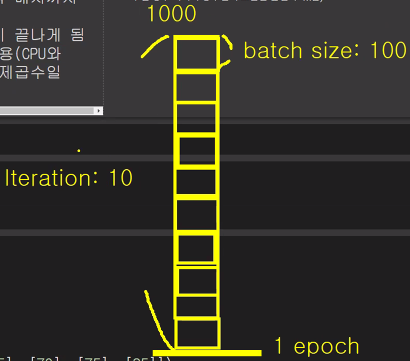

- 각 배치 사이즈를 한꺼번에 계산
- w, b 를 10번 업데이트

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
x_train = torch.FloatTensor([[2, 0, 0],
                             [2, 1, 0],
                             [2, 2, 1],
                             [3, 1, 1],
                             [4, 1, 2],
                             [4, 2, 2]])
y_train = torch.FloatTensor([[50], [60], [65], [70], [75], [85]])

##2. 데이터 로드
- 데이터를 좀 더 쉽게 다룰 수 있도록 데이터 셋과 데이터 로드를 파이토치 및 텐서 플로우에서 제공
- 배치 학습, 데이터 셔플, 병렬 처리를 간단하게 수행

In [ ]:
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader

In [ ]:
# BGD(Batch Gradient Descent) 
# 전체 데이터 셋에 대해 에러를 구한 뒤 기울기를 한번만 계산하여 모델의 파라미처를 업데이트 하는 방식

# SGD(Stochastic Gradient Descent)
# 추출된 각각의 데이터에 대해 Gradient 계산 후 업데이트하는 알고리즘

# MS(G)D(Mini-Batch Stochastic Gradient Descent)
# batch를 구성하고 해당 batch의 기울기를 통해 모델을 업데이트

dataset = TensorDataset(x_train, y_train)
dataloader = DataLoader(dataset, batch_size=2, shuffle=True)  # 에폭마다 배치 사이즈로 나누고 셔플시켜줌

In [ ]:
model = nn.Linear(3,1 )
optimizer = torch.optim.SGD(model.parameters(), lr=1e-5)

In [ ]:
epoch_count = 6000

for epoch in range(epoch_count+1):
  for batch_idx, datas in enumerate(dataloader):
    #print(batch_idx)
    #print(datas)
    x_train, y_train = datas
    H = model(x_train)
    cost = F.mse_loss(H, y_train)

    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    print('Epoch {:4d}/{} Batch {}/{} Cost : {:.6f}'.format(epoch, epoch_count, batch_idx+1, len(dataloader), cost.item()))

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
Epoch 4334/6000 Batch 2/3 Cost : 120.212585
Epoch 4334/6000 Batch 3/3 Cost : 177.068069
Epoch 4335/6000 Batch 1/3 Cost : 177.062531
Epoch 4335/6000 Batch 2/3 Cost : 120.192032
Epoch 4335/6000 Batch 3/3 Cost : 38.425865
Epoch 4336/6000 Batch 1/3 Cost : 165.775391
Epoch 4336/6000 Batch 2/3 Cost : 104.151901
Epoch 4336/6000 Batch 3/3 Cost : 65.745201
Epoch 4337/6000 Batch 1/3 Cost : 205.749176
Epoch 4337/6000 Batch 2/3 Cost : 75.496803
Epoch 4337/6000 Batch 3/3 Cost : 54.446091
Epoch 4338/6000 Batch 1/3 Cost : 54.425098
Epoch 4338/6000 Batch 2/3 Cost : 104.148262
Epoch 4338/6000 Batch 3/3 Cost : 177.050659
Epoch 4339/6000 Batch 1/3 Cost : 54.413040
Epoch 4339/6000 Batch 2/3 Cost : 131.466141
Epoch 4339/6000 Batch 3/3 Cost : 149.727295
Epoch 4340/6000 Batch 1/3 Cost : 120.107300
Epoch 4340/6000 Batch 2/3 Cost : 177.044296
Epoch 4340/6000 Batch 3/3 Cost : 38.439106
Epoch 4341/6000 Batch 1/3 Cost : 205.658722
Epoch 4341/6000 Batch 2/3 Cost : 38.444740
Epoc

In [ ]:
var = torch.FloatTensor([[5, 2, 3]])
pred = model(var)
print('학습 후 입력이 5, 2, 3 일 때 예측 값 :', pred)

학습 후 입력이 5, 2, 3 일 때 예측 값 : tensor([[113.2010]], grad_fn=<AddmmBackward0>)
